In [44]:
# import pandas as pd
# import matplotlib.pyplot as plt
# xlsx_file = 'start.xlsx'
# csv_file = 'segmen.csv'

# df = pd.read_excel(xlsx_file)
# df.to_csv(csv_file, index=False, encoding='utf-8')

# df

KeyboardInterrupt: 

In [119]:
import pandas as pd
import matplotlib.pyplot as plt


df1 = pd.read_csv('fichier_base.csv')
noms_colonnes_fr = {
    'Invoice': 'num_facture',
    'StockCode': 'code_produit',
    'Description': 'description',
    'Quantity': 'quantité',
    'InvoiceDate': 'date_facture',
    'Price': 'prix',
    'Customer ID': 'num_client',
    'Country': 'pays'
}

# Renommez les colonnes en utilisant le dictionnaire de correspondance
df1.rename(columns=noms_colonnes_fr, inplace=True)
df1.dropna(inplace=True)

In [56]:
df1.columns

Index(['num_facture', 'code_produit', 'description', 'quantité',
       'date_facture', 'prix', 'num_client', 'pays'],
      dtype='object')

# analyse retour/annulation client

In [120]:
#pourcentage de quantité qui sont négatives

nb_negative = len(df1[df1['quantité'] < 0])

# Calcul du pourcentage
pourcentage = (nb_negative / len(df1)) * 100
pourcentage

2.3564548036806583

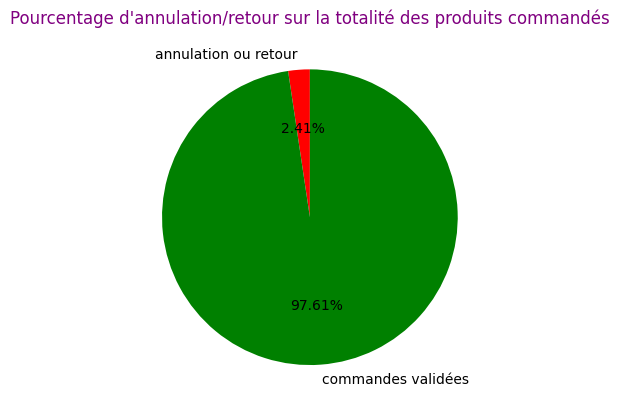

In [121]:
# Calcul du nombre de lignes avec une valeur négative dans la colonne "quantité"
nb_negative = len(df1[df1['quantité'] < 0])

# Calcul du nombre de lignes avec une valeur positive
nb_positive = len(df1[df1['quantité'] >= 0])

# Création d'une liste des valeurs pour le graphique
sizes = [nb_negative, nb_positive]

# Labels pour le graphique
labels = ['annulation ou retour', 'commandes validées' ]

colors=['red', 'green']
# Création du graphique à secteurs
plt.pie(sizes, labels=labels, autopct='%2.1f1%%', startangle=90, colors=colors)

# Titre du graphique
plt.title("Pourcentage d'annulation/retour sur la totalité des produits commandés", color='purple')

# Af1ichage du graphique
plt.show()

In [122]:
df1['retour'] = 0

# Parcours du DataFrame et mise à jour de la colonne 'retour' en fonction des conditions
for index, row in df1.iterrows():
    if row['quantité'] < 0:
        if 'c' not in row['num_facture'].upper():
            df1.at[index, 'retour'] = 1


KeyboardInterrupt: 

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   num_facture   417534 non-null  object 
 1   code_produit  417534 non-null  object 
 2   description   417534 non-null  object 
 3   quantité      417534 non-null  int64  
 4   date_facture  417534 non-null  object 
 5   prix          417534 non-null  float64
 6   num_client    417534 non-null  float64
 7   pays          417534 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 28.7+ MB


In [12]:

# from ydata_profiling import ProfileReport
# from ipywidgets import HTML, Button, widgets
# import numpy
# import sys
# df = pd.read_csv('segmen.csv')
# profile = ProfileReport(df)
# profile.to_widgets()
# profile.to_file("rapport.html")

# analyse des prix des articles

In [73]:
df1['prix'].mean()

3.8875474667931234

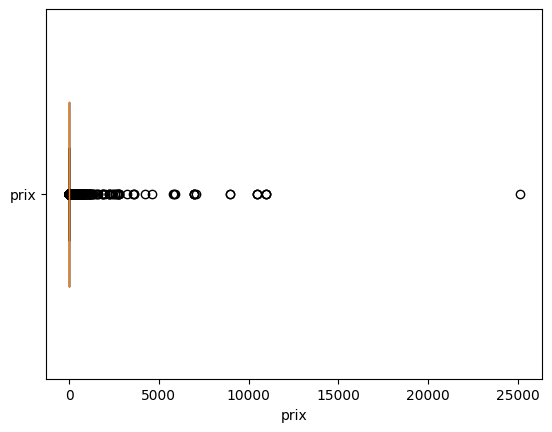

In [75]:
plt.boxplot(df1['prix'], vert=False, widths=0.5, labels=['prix'])

# Ajout d'un titre à l'axe x
plt.xlabel('prix')

# Affichage du boxplot horizontal
plt.show()


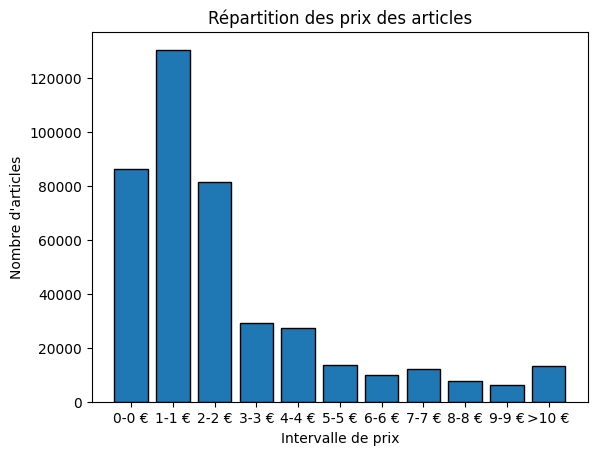

In [123]:
import numpy as np

intervals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, np.inf]

# Calcul du nombre d'articles dans chaque intervalle
hist, bins = np.histogram(df1['prix'], bins=intervals)

# Création de l'axe x des intervalles
interval_labels = []
for i in range(len(bins)-1):
    if i < len(bins)-2:
        interval_labels.append(f'{int(bins[i])}-{int(bins[i+1])-1} €')
    else:
        interval_labels.append(f'>{int(bins[i])} €')

# Création de l'histogramme des prix
plt.bar(interval_labels, hist, edgecolor='black')

# Ajout d'un titre au graphique
plt.title('Répartition des prix des articles')

# Ajout d'un label à l'axe x
plt.xlabel('Intervalle de prix')

# Ajout d'un label à l'axe y
plt.ylabel("Nombre d'articles")

# Affichage de l'histogramme
plt.show()

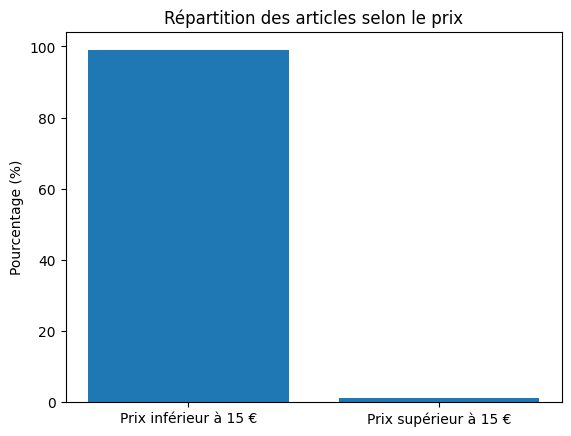

In [94]:
articles_inf_5 = df1[df1['prix'] < 15]

# Calcul du pourcentage
pourcentage_inf_5 = len(articles_inf_5) / len(df1) * 100

# Création du graphique
plt.bar(['Prix inférieur à 15 €', 'Prix supérieur à 15 €'], [pourcentage_inf_5, 100 - pourcentage_inf_5])

# Ajout du titre du graphique
plt.title('Répartition des articles selon le prix')

# Ajout de l'étiquette de l'axe y
plt.ylabel('Pourcentage (%)')

# Affichage du graphique
plt.show()


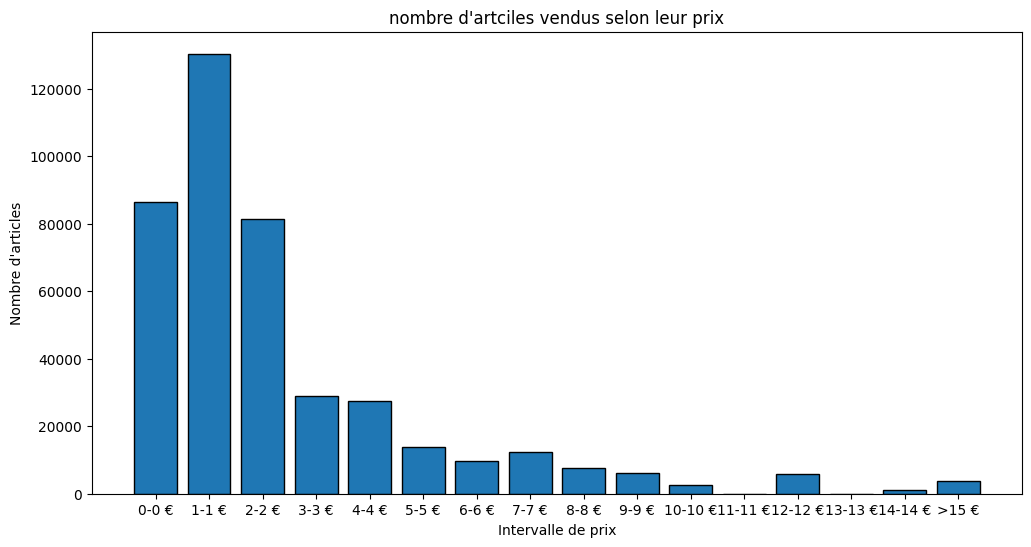

In [100]:
import numpy as np

# Définition des intervalles de prix
intervals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15, np.inf]

# Calcul du nombre d'articles dans chaque intervalle
hist, bins = np.histogram(df1['prix'], bins=intervals)

# Création de l'axe x des intervalles
interval_labels = [f'{int(bins[i])}-{int(bins[i+1])-1} €' if i < len(bins) - 2 else f'>{int(bins[i])} €' for i in range(len(bins)-1)]


plt.figure(figsize=(12, 6))
# Création de l'histogramme des prix
plt.bar(interval_labels, hist, edgecolor='black')

# Ajout d'un titre au graphique
plt.title("nombre d'artciles vendus selon leur prix")

# Ajout d'un label à l'axe x
plt.xlabel('Intervalle de prix')

# Ajout d'un label à l'axe y
plt.ylabel('Nombre d\'articles')

# Affichage de l'histogramme
plt.show()


In [124]:
df1['qcut_prix'], inter=pd.qcut(df1['prix'],10, labels=[1,2,3,4,5,6,7,8,9,10],retbins=True)
df1['qcut_prix'] = df1['qcut_prix'].astype(int)

df1['prix_achat_moyen'] = df1.groupby('num_client')['qcut_prix'].transform('mean')

In [104]:
df1['AchatsTotaux'] = df1.groupby('num_client')['TotalFacture'].transform('sum')


KeyError: 'Column not found: TotalFacture'

In [26]:
df.columns

Index(['Invoice', 'code_produit', 'description', 'quantité', 'date_facture',
       'Price', 'Customer ID', 'pays', 'Total', 'TotalFacture', 'qcut_prix',
       'MeanQcut', 'AchatsTotaux'],
      dtype='object')

# faire new df à partir de tout ça: 

In [27]:
new_df = df.groupby('Customer ID')[['Customer ID', 'MeanQcut', 'AchatsTotaux']].first().reset_index()
new_df.to_csv('nouveau_fichier.csv', index=False)

ValueError: cannot insert Customer ID, already exists

In [30]:
new_df = df.groupby('Customer ID')[[  'MeanQcut', 'AchatsTotaux']].first().reset_index()
new_df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)
new_df.to_csv('nouveau_fichier.csv', index=False)

In [ ]:
df['Note'] = 0
customer_counts = df[df['Invoice'].str.contains('c', case=False)].groupby('Customer ID').size()
top_customers = customer_counts.nlargest(5).index


In [31]:

# Calculer le quantile pour chaque client en utilisant la méthode qcut
df['Quantile'] = df.groupby('Customer ID')['Invoice'].transform(lambda x: pd.qcut(x, q=6, labels=False))

# Faire une jointure entre les données des quantiles et les données des clients
df = df.merge(customer_counts, on='Customer ID', how='left')

# Calculer la note en multipliant le quantile par le nombre d'invoices contenant le caractère 'c' et diviser par le nombre total d'invoices du client
df['Note'] = df['Quantile'] * df[0] / df.groupby('Customer ID')['Invoice'].transform('count')

# Remplacer les valeurs manquantes dans la colonne 'Note' par 0
df['Note'] = df['Note'].fillna(0)

# Afficher le DataFrame avec les colonnes 'Customer ID', 'Invoice', 'Note'
new_df = df[['Customer ID', 'Invoice', 'Note']].copy()


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# les annulateurs pro

In [35]:
df['Invoice'] = pd.to_numeric(df['Invoice'], errors='coerce')

# Drop duplicate values in the 'Invoice' column
df = df.drop_duplicates(subset='Invoice')

# Calculer le quantile pour chaque client en utilisant la méthode qcut
df['annulateurs'] = df.groupby('Customer ID')['Invoice'].transform(lambda x: pd.qcut(x, q=6, labels=False, duplicates='drop'))

# # Faire une jointure entre les données des quantiles et les données des clients
# df = df.merge(customer_counts, on='Customer ID', how='left')

# # Calculer la note en multipliant le quantile par le nombre d'invoices contenant le caractère 'c' et diviser par le nombre total d'invoices du client
# df['Note'] = df['Quantile'] * df[0] / df.groupby('Customer ID')['Invoice'].transform('count')

# # Remplacer les valeurs manquantes dans la colonne 'Note' par 0
# df['Note'] = df['Note'].fillna(0)

# # Afficher le DataFrame avec les colonnes 'Customer ID', 'Invoice', 'Note'
# new_df = df[['Customer ID', 'Invoice', 'Note']].copy()

In [14]:
df.columns

Index(['Invoice', 'code_produit', 'description', 'quantité', 'date_facture',
       'Price', 'Customer ID', 'pays'],
      dtype='object')

In [41]:
a = {}
for index, row in df.iterrows():
    num_facture = row['Invoice']
    qtite = row['quantité']
    prix = row['Price']
    
    if num_facture not in a:
        a[num_facture] = 0
    
    a[num_facture] += qtite * prix
    

In [43]:
for i,j in a.items():
    for index, row in df.iterrows():
        if i==index:
            df['entre']==j
            

KeyError: 'entre'

In [ ]:
a
for key in a:
    a[key] = round(a[key], 2)
a

{'489434': 505.3,
 '489435': 145.8,
 '489436': 630.33,
 '489437': 310.75,
 '489438': 2286.24,
 '489439': 426.3,
 '489440': 50.4,
 '489441': 344.34,
 '489442': 382.37,
 '489443': 285.06,
 '489444': 141.0,
 '489445': 308.44,
 '489446': 996.1,
 '489447': 130.0,
 '489448': 570.24,
 'C489449': -196.1,
 '489450': 196.1,
 'C489459': -148.3,
 '489460': 485.79,
 '489461': 589.33,
 '489462': 148.3,
 '489464': 0.0,
 '489465': 1197.8,
 '489463': 0.0,
 '489467': 0.0,
 'C489476': -12.6,
 '489488': 251.1,
 'C489503': -13.45,
 'C489504': -15.3,
 '489505': 255.5,
 '489514': 823.02,
 '489517': 282.46,
 'C489518': -38.4,
 '489519': 696.73,
 '489520': 733.63,
 '489521': 0.0,
 '489522': 700.31,
 '489523': 1160.0,
 'C489524': -12.75,
 '489525': 1.4,
 '489526': 929.92,
 'C489527': -43.95,
 'C489528': -7.95,
 '489529': 229.46,
 'C489530': -4.25,
 '489531': 145.0,
 '489532': 304.53,
 '489533': 192.75,
 'C489534': -5.95,
 'C489535': -28.0,
 '489536': 367.41,
 '489537': 633.33,
 'C489538': -36.58,
 '489540': 537

# total d'achat par facture

In [132]:
df1['Totale'] = df1['quantité'] * df1['prix']
a = df1.groupby('num_facture')['Totale'].sum().round(2)

# Création d'une nouvelle colonne avec les valeurs calculées
df1['Total'] = df1['num_facture'].map(a)


# facture totale par client

In [126]:
df1['TotalFacture'] = df1.groupby('num_facture')['Total'].transform('sum').round(2)
df1['gros_client'] = pd.qcut(df1['TotalFacture'], q=10, labels=range(10, 0, -1))

# Affichage du résultat


In [127]:
df1['frequence_achat'] = pd.qcut(df1.groupby('num_client')['num_facture'].transform('nunique'), q=10, labels=range(1, 11))

# nbre_total_factures

In [128]:
df1['nbre_factures'] = df1.groupby('num_client')['num_facture'].transform('nunique')

In [129]:
df1['frequence_achat'] = pd.qcut(df1.groupby('num_client')['num_facture'].transform('nunique'), q=10, labels=range(1, 11))

# garder 1 df avec que  les num client

In [130]:
df_unique = df1.drop_duplicates(subset='num_client')


In [ ]:
df.dropna()


NameError: name 'df' is not defined

In [133]:
df1.to_csv('df_pr_kmean')

In [ ]:
# dégager les clients sans historique
# voir si ap 1 ou 2 mois ou 10 d'ingestion de données, ca change
# classification ou recalcule des clusters
# analyse cluster: faire un groupbt par cluster , pr voir ses caractéristiques(cluster a= achats faibles, forts etc)
#use acp pr réduire les dimensions + mettre 

# differencier clients uk et autres pays : cptmt achat différent

In [156]:
df_uk = df1.query("pays == 'United Kingdom'")
df_uk.to_csv("que_uk")




In [162]:
df_uk=pd.read_csv("que_uk")

df_uk['Totale'] = df_uk['quantité'] * df_uk['prix']
a = df_uk.groupby('num_facture')['Totale'].sum().round(2)

# Création d'une nouvelle colonne avec les valeurs calculées
df_uk['Total'] = df_uk['num_facture'].map(a)
df_uk['frequence_achat'] = pd.qcut(df_uk.groupby('num_client')['num_facture'].transform('nunique'), q=10, labels=range(1, 11))
df_uk['TotalFacture'] = df_uk.groupby('num_facture')['Total'].transform('sum').round(2)
df_uk['gros_client'] = pd.qcut(df_uk['TotalFacture'], q=10, labels=range(10, 0, -1))
df_uk.describe()
df_uk['gros_client']=df_uk['gros_client'].astype(int)
a=df_uk['gros_client'].mean()
a


5.500573238838974

In [137]:
df_other = df1.query("pays != 'United Kingdom'")
df_other.to_csv("other_uk")

In [166]:
df_other['gros_client'].describe()

count    38111.000000
mean         5.507544
std          2.869128
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: gros_client, dtype: float64

In [164]:
df_other=pd.read_csv('other_uk')
df_other['Totale'] = df_other['quantité'] * df_other['prix']
a = df_other.groupby('num_facture')['Totale'].sum().round(2)

# Création d'une nouvelle colonne avec les valeurs calculées
df_other['Total'] = df_other['num_facture'].map(a)

df_other['frequence_achat'] = pd.qcut(df_other.groupby('num_client')['num_facture'].transform('nunique'), q=10, labels=range(1, 11), duplicates='drop')
df_other['TotalFacture'] = df_other.groupby('num_facture')['Total'].transform('sum').round(2)
df_other['gros_client'] = pd.qcut(df_other['TotalFacture'], q=10, labels=range(10, 0, -1))
df_other['gros_client']=df_other['gros_client'].astype(int)
a=df_other['gros_client'].mean()
a

5.507543753771877

In [169]:
df_other['frequence_achat'] = pd.qcut(df_other.groupby('num_client')['num_facture'].transform('nunique'), q=11, labels=range(1, 11), duplicates='drop')

In [165]:
df_uk['gros_client'].describe()

count    379423.000000
mean          5.500573
std           2.872052
min           1.000000
25%           3.000000
50%           6.000000
75%           8.000000
max          10.000000
Name: gros_client, dtype: float64

In [ ]:
df_uk.to_csv('only_uk')

In [155]:
df_other.describe()

,Unnamed: 0,quantité,prix,num_client,retour,qcut_prix,prix_achat_moyen,Total,TotalFacture,frequence_achat,nbre_factures,Totale
count,38111.000000,38111.000000,38111.000000,38111.000000,38111.000000,38111.000000,38111.000000,38111.000000,3.811100e+04,38111.000000,38111.000000,38111.000000
mean,269263.711369,25.773924,6.220163,13376.564981,0.005012,5.309228,5.309098,1510.097827,1.020056e+05,5.960589,62.620792,34.364329
std,143476.873583,254.442512,91.539438,1153.948898,0.070617,2.992253,0.824030,3218.846274,2.997985e+05,3.398939,94.671286,125.572279
min,71.000000,-7128.000000,0.000000,12347.000000,0.000000,1.000000,1.850000,-11880.840000,-5.346378e+05,1.000000,1.000000,-6958.170000
25%,150181.500000,5.000000,1.250000,12519.000000,0.000000,3.000000,4.769634,441.230000,9.461800e+03,3.000000,4.000000,12.750000
50%,274661.000000,10.000000,1.950000,12705.000000,0.000000,5.000000,5.421488,783.840000,2.747160e+04,6.000000,9.000000,17.400000
75%,388025.500000,16.000000,3.750000,14564.000000,0.000000,8.000000,5.878284,1388.540000,8.024562e+04,10.000000,87.000000,30.000000
max,524695.000000,19152.000000,6958.170000,18140.000000,1.000000,10.000000,10.000000,44051.600000,4.140850e+06,10.000000,270.000000,6958.170000


In [148]:
country_counts = df.groupby('pays')['num_client'].nunique()
uk_clients = df1[df1['pays'] == 'United Kingdom']['num_client'].nunique()
uk_percentage = (uk_clients / country_counts.sum()) * 100
uk_percentage

93.42440379717527

In [ ]:
df_uk

In [ ]:
df_other

In [ ]:
# pou